# Description of the dataset 

The dataset is captured in a farm of animals and it was manually labeled to identify the state of an animal based on its position.

The following are the dataset attributes: 

* time_stamp = time stamp of the collected abservation

* pos_x = position in axis X

* pos_y = position in axis Y

* pos_z = position in axis Z

The target is the column **label** it consists of the possible animal states:

* Walking
* Grazing
* Stand up
* Sternal lying
* Licking calf



# Import libraries

In [13]:
import pandas as pd 
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive 

drive.mount("/content/drive")

Mounted at /content/drive


# Upload data

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Data/Cattlechain/output_data_filtered")

In [ ]:
df.head()

,pos_x,pos_y,pos_z,label
0,-6.53255,2.71072,5.54596,Grazing
1,-7.69155,3.19922,5.79500,Grazing
2,-6.97316,3.77393,4.86588,Grazing
3,-6.77201,2.53831,1.56130,Grazing
4,-7.27967,2.30842,4.32949,Grazing


In [ ]:
df.label.unique()

array(['Grazing', 'Stand up', 'Sternal lying', 'Walking', nan,
       'Licking calf'], dtype=object)

In [15]:
#deleteing rows with label equal to nan 
df= df.dropna()

In [ ]:
df.label.unique()

array(['Grazing', 'Stand up', 'Sternal lying', 'Walking', 'Licking calf'],
      dtype=object)

# Exploratory data analysis (EDA)

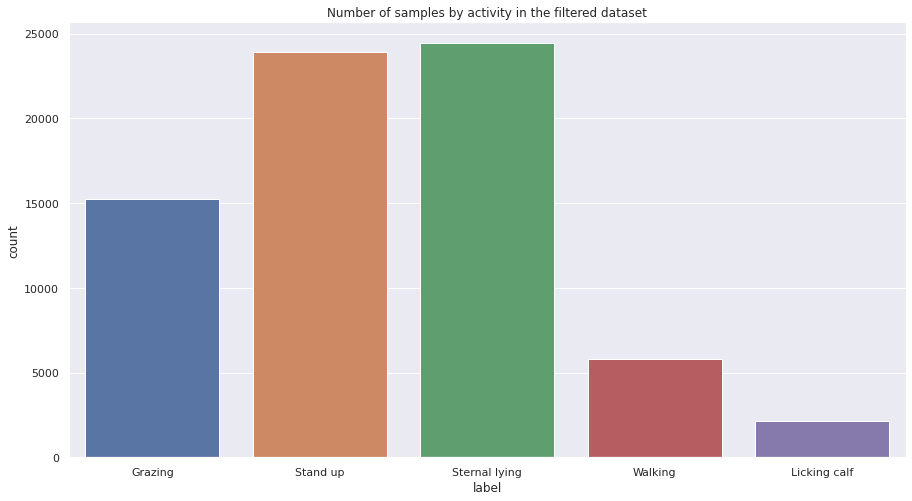

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x = "label", data = df)
plt.title("Number of samples by activity in the filtered dataset")
plt.show()

In [ ]:
df_Sternal_lying = df.query('label == "Sternal lying"') 
df_Grazing = df.query('label == "Grazing"') 
df_Stand_up = df.query('label == "Stand up"')  
df_Licking_calf = df.query('label == "Licking calf"') 
df_Walking = df.query('label == "Walking"') 

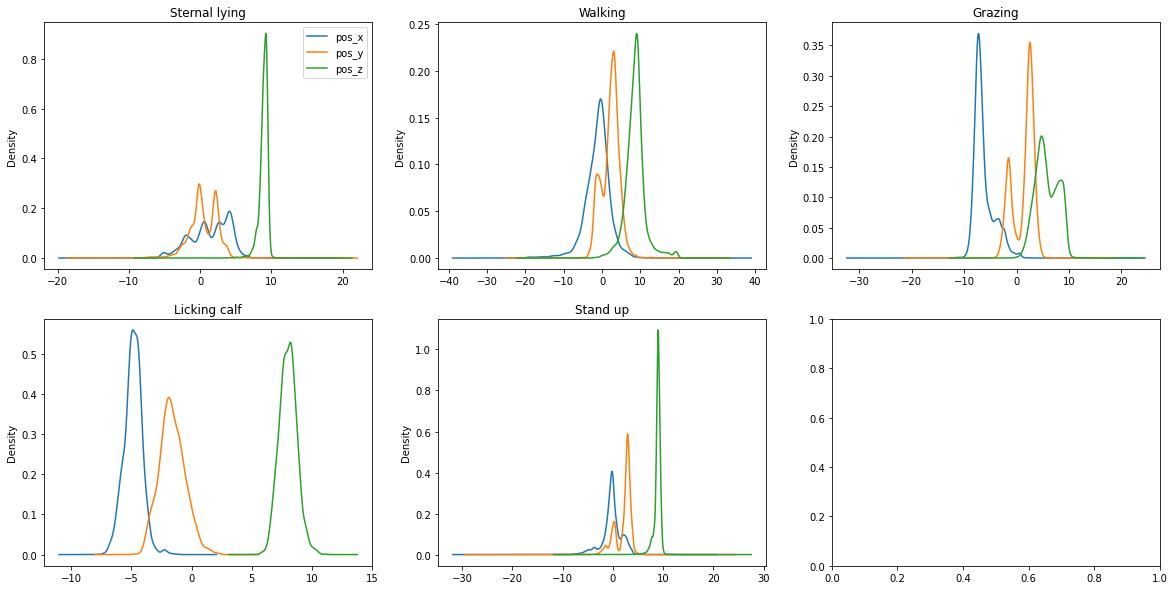

In [ ]:
# histogram and kde plot 
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

df_Sternal_lying.plot.kde(ax=axs[0, 0], legend=True, title="Sternal lying")
#df_Sternal_lying.plot.hist(density=True, ax=axs[0, 0])
df_Walking.plot.kde(ax=axs[0, 1], legend=False, title="Walking")
#df_Walking.plot.hist(density=True, ax=axs[0, 1])
df_Grazing.plot.kde(ax=axs[0, 2], legend=False, title="Grazing")
#df_Grazing.plot.hist(density=True, ax=axs[0, 2])
df_Licking_calf.plot.kde(ax=axs[1, 0], legend=False, title="Licking calf")
#df_Licking_calf.plot.hist(density=True, ax=axs[2, 0])
df_Stand_up.plot.kde(ax=axs[1, 1], legend=False, title="Stand up")
#df_Stand_up.plot.hist(density=True, ax=axs[2, 2])

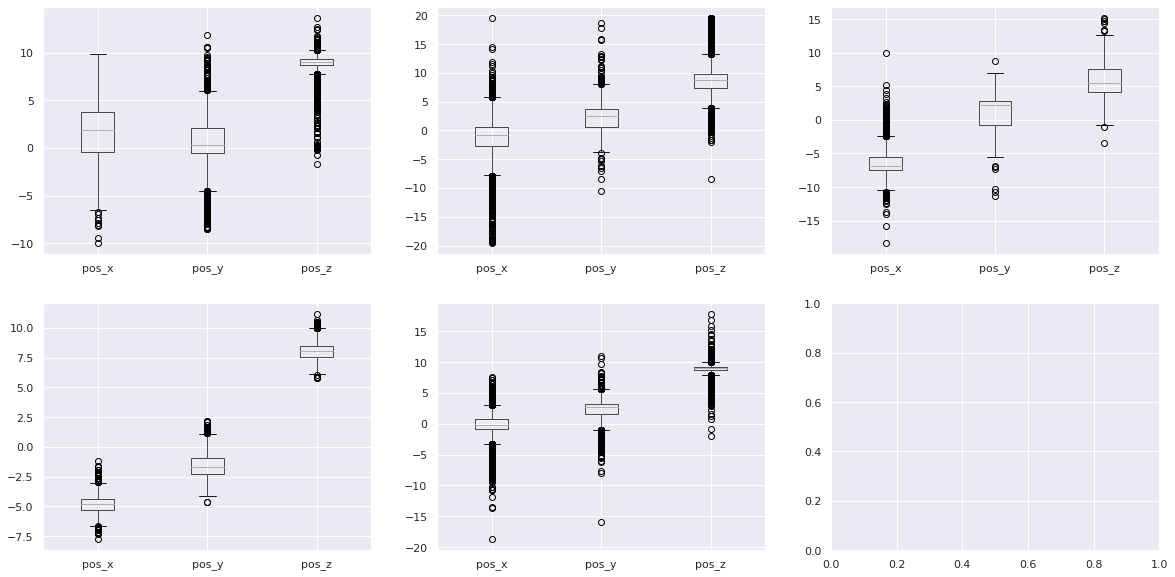

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

df_Sternal_lying.boxplot(ax=axs[0, 0])
df_Walking.boxplot(ax=axs[0, 1])
df_Grazing.boxplot(ax=axs[0, 2])
df_Licking_calf.boxplot(ax=axs[1, 0])
df_Stand_up.boxplot(ax=axs[1, 1])

# Standard Scaler

In [16]:
scaler = StandardScaler()
df[["pos_x","pos_y","pos_z"]]= scaler.fit_transform(df[["pos_x","pos_y","pos_z"]])

The data suffers from skewness, one possibility to handle is is by applying the log transform. 

# Log transform

In [55]:
dff= df.copy()

In [ ]:
# Log transform 
dff['pos_x'] = dff['pos_x'].apply(np.log)
dff['pos_y'] = dff['pos_y'].apply(np.log)
dff['pos_z'] = dff['pos_z'].apply(np.log)

In [56]:
#Negative Values Handling
#Log transform
dff['log_pos_x'] = (dff['pos_x']-dff['pos_x'].min()+1).transform(np.log)
dff['log_pos_y'] = (dff['pos_y']-dff['pos_y'].min()+1).transform(np.log)
dff['log_pos_z'] = (dff['pos_z']-dff['pos_z'].min()+1).transform(np.log)

In [28]:
dff = dff.drop(columns=["pos_x","pos_y","pos_z"])

In [29]:
dff_Sternal_lying = dff.query('label == "Sternal lying"') 
dff_Grazing = dff.query('label == "Grazing"') 
dff_Stand_up = dff.query('label == "Stand up"')  
dff_Licking_calf = dff.query('label == "Licking calf"') 
dff_Walking = dff.query('label == "Walking"')

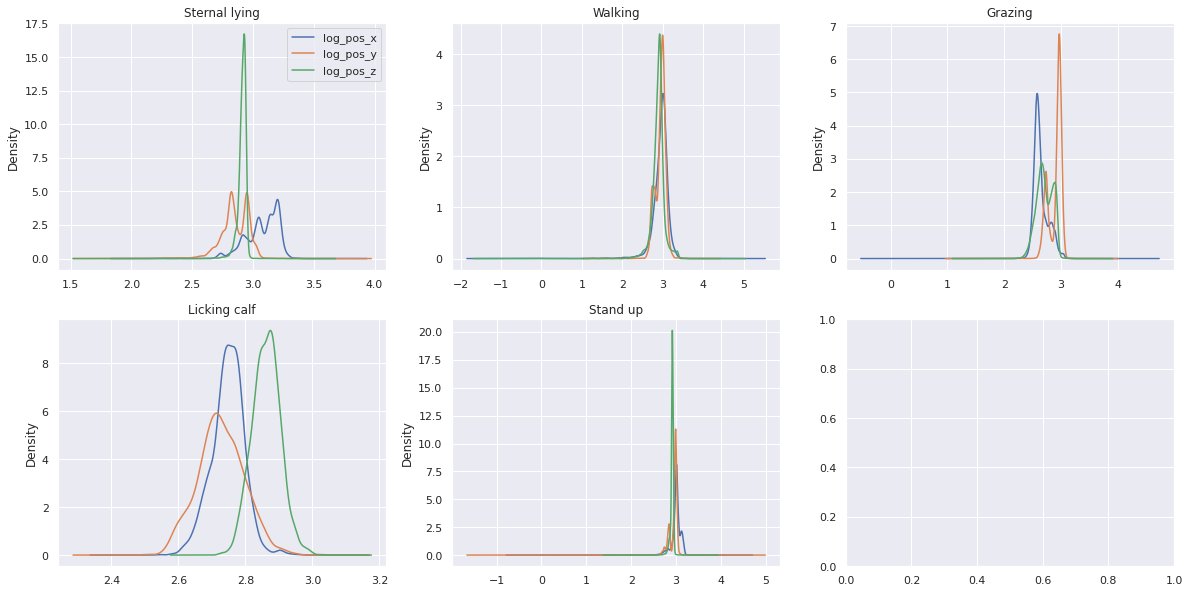

In [30]:
#kde plot after log transform 
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

dff_Sternal_lying.plot.kde(ax=axs[0, 0], legend=True, title="Sternal lying")
dff_Walking.plot.kde(ax=axs[0, 1], legend=False, title="Walking")
dff_Grazing.plot.kde(ax=axs[0, 2], legend=False, title="Grazing")
dff_Licking_calf.plot.kde(ax=axs[1, 0], legend=False, title="Licking calf")
dff_Stand_up.plot.kde(ax=axs[1, 1], legend=False, title="Stand up")

The training has been performed with data which has be transformed with a log function but the accuracy of the model did not change than without using it. 

So in this Notebook, the following steps are performed on the features without applying the log transform on

# Label Encoding 

In [17]:
from sklearn.preprocessing import LabelEncoder
Y=df.label
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [18]:
y = label_encoded_y

In [ ]:
list(label_encoder.inverse_transform([0,1,2,3,4]))

['Grazing', 'Licking calf', 'Stand up', 'Sternal lying', 'Walking']

In [13]:
df.head()

,pos_x,pos_y,pos_z,label
0,-1.441070,0.682508,-1.426030,Grazing
1,-1.751247,0.919277,-1.291752,Grazing
2,-1.558988,1.197831,-1.792719,Grazing
3,-1.505155,0.598943,-3.574496,Grazing
4,-1.641018,0.487519,-2.081932,Grazing


# Stratified train-test-split

Stratified splits are desirable in some cases, like when you’re classifying an imbalanced dataset, a dataset with a significant difference in the number of samples that belong to distinct classes

In [19]:
X=df.iloc[:,0:3]

In [32]:
X.head()

,pos_x,pos_y,pos_z
0,-1.441070,0.682508,-1.426030
1,-1.751247,0.919277,-1.291752
2,-1.558988,1.197831,-1.792719
3,-1.505155,0.598943,-3.574496
4,-1.641018,0.487519,-2.081932


In [20]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(X, y):
	x_train, x_test = X.iloc[train_ix], X.iloc[test_ix]
	y_train, y_test = y[train_ix], y[test_ix]

In [39]:
#Result of Stratified train-test-split: the number of samples in each class 
a=y_test
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 3045, 1: 426, 2: 4777, 3: 4887, 4: 1159}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



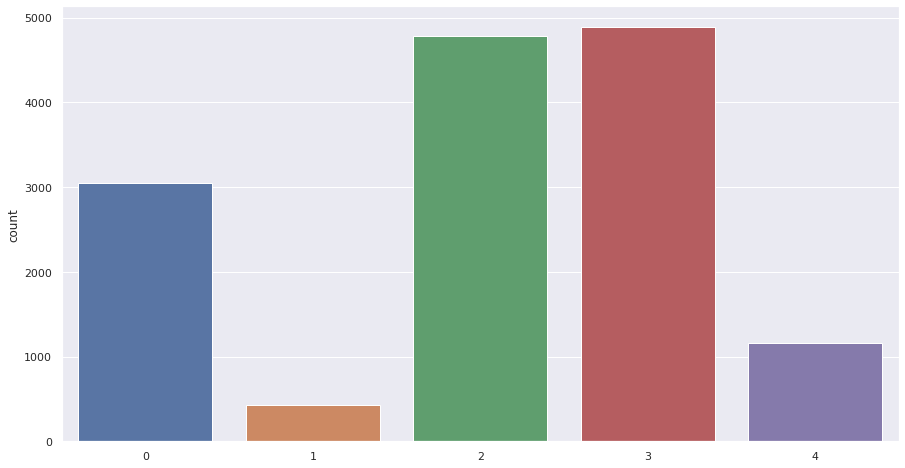

In [40]:
sns.countplot(a)

# XGboost 

In [22]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, objective="multi:softmax", n_estimators=100, 
                        num_classes=5,verbosity=1) 


xgbm = model.fit(x_train.values, y_train)

# Model metrics 

In [23]:
pred = xgbm.predict(x_test.values)

In [24]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
# Reverse the label encoding to get the predicted labels 
predictions = label_encoder.inverse_transform(pred)

In [45]:
# Reverse the label encoding to get the actual labels 
y_test_cat = label_encoder.inverse_transform(y_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_cat, predictions))

               precision    recall  f1-score   support

      Grazing       0.86      0.91      0.88      3045
 Licking calf       0.57      0.48      0.52       426
     Stand up       0.78      0.80      0.79      4777
Sternal lying       0.82      0.83      0.82      4887
      Walking       0.81      0.59      0.68      1159

     accuracy                           0.81     14294
    macro avg       0.77      0.72      0.74     14294
 weighted avg       0.80      0.81      0.80     14294



# Saving the model 

Pickle is the standard way of serializing objects in Python.

You can use the Python pickle API to serialize your machine learning algorithms and save the serialized format to a file, for example:

In [25]:
import pickle

# save model to file
pickle.dump(xgbm, open("/content/drive/MyDrive/Cattlechain/animal_activity_model.pkl", "wb"))

Loading the saved pickle file to deserialize the xgboost trained model and use it to make new predictions

In [26]:
import pickle

# load model from file
loaded_model = pickle.load(open("/content/drive/MyDrive/Cattlechain/animal_activity_model.pkl", "rb"))

Loading model

In [51]:
predict = loaded_model.predict(x_test)

In [52]:
predict

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
input= [[-1.751247,3.751247,0.598943 ]]

In [28]:
pred_name = loaded_model.predict([[-1.751247,3.751247,0.598943 ]])

In [30]:
label_encoder.inverse_transform(pred_name)

array(['Walking'], dtype=object)